In [9]:
# BSM-Model (with no carry benefits)

# c = SN(d1) - exp(-rT)XN(d2)
# p = exp(-rT)XN(-d2) - SN(-d1)

# where

# d1 = [ln(S/X) + (r + sigma^2 / 2) T] / (sigma * sqrt(T))
# d2 = d1 - sigma * sqrt(T)

# sigma is the volatility
# r is the annualized continuously compounded (risk-free) interest rate
# N(x) denotes the standard normal cumulative distribution function

# ======================================================================

# BSM-Model (with carry benefits (continuously compounded, denoted as q))

# c = exp(-qT)SN(d1) - exp(-rT)XN(d2)
# p = exp(-rT)XN(-d2) - exp(-qT)SN(-d1)

# Greeks:
# https://en.wikipedia.org/wiki/Greeks_(finance)#Formulas_for_European_option_Greeks

from math import *
from scipy.stats import norm
import numpy as np

In [60]:
# Calculate option price based on BSM model
def calc_bsm_opt_price(S, X, T, sigma, r, q = 0, optype = 'c'):
    d1 = (np.log(S / X) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N = norm.cdf
    if optype == 'c':
        delta = np.exp(-q * T) * N(d1)
        print('Call delta is {}'.format(delta))
        prm = S * delta - np.exp(-r * T) * X * N(d2)
    else:
        delta = -np.exp(-q * T) * N(-d1)
        print('Put delta is {}'.format(delta))
        prm = np.exp(-r * T) * X * N(-d2) + S * delta
    return prm
#end def

In [48]:
calc_bsm_opt_price(2.490, 2.153, 15/365, 0.1458, 0.0361)

Call delta is 0.9999996902148528


0.34019174434848853

In [254]:
calc_bsm_opt_price(2.465, 2.153, 13/365, 0.3, 0.036, optype = 'c')

Call delta is 0.9926811616748163


0.31509971999303987

In [41]:
calc_bsm_opt_price(100, 100, 1, 0.32, 0.05)

14.990197597320858

In [ ]:
# 上证 50 ETF 波动率指数 计算方法
# http://www.csindex.com.cn/sseportal/upload/files/upload/000188hbook.pdf



In [49]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt

In [112]:
r_S_expect = 0.0
sigma = 0.1455/sqrt(244)
r_S_series = np.linspace(r_S_expect-3*sigma, r_S_expect+3*sigma, 100)

#plt.plot(r_S_series, norm.pdf(r_S_series, r_S_expect, sigma))
#plt.show()

Call delta is 1.0
Call delta is [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


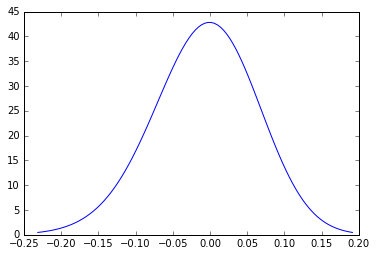

In [113]:
S = 2.482
S_series = S * np.exp(r_S_series)

X = 2.153
T = 15/365
r_rf = 0.0361    # risk free rate
p_opt_now = calc_bsm_opt_price(S, X, T, sigma, r_rf, optype='c')
v_opt_sr = calc_bsm_opt_price(S_series, X, T-1/365, sigma, r_rf, optype='c')

i1 = len(v_opt_sr) // 2
i2 = (len(v_opt_sr) - 1) // 2
v_opt_mid = (v_opt_sr[i1] + v_opt_sr[i2]) / 2

r_opt_sr = np.log(v_opt_sr / p_opt_now)
plt.plot(r_opt_sr, norm.pdf(r_S_series, r_S_expect, sigma))
plt.show()

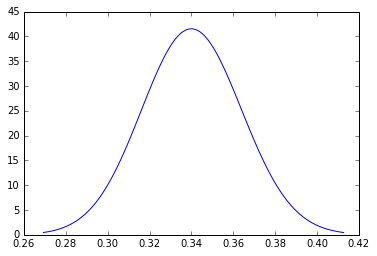

In [103]:
plt.plot(v_opt_sr, norm.pdf(r_S_series, r_S_expect, sigma))
plt.show()

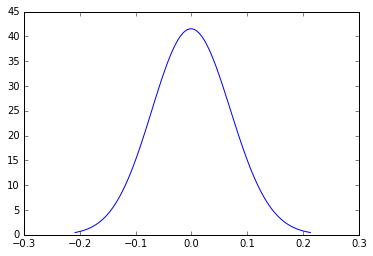

In [102]:
plt.plot(np.exp(r_opt_sr)-1, norm.pdf(r_S_series, r_S_expect, sigma))
plt.show()

In [114]:
prbd = norm.pdf(r_S_series, r_S_expect, sigma)
r_gaps = r_opt_sr[1:] - r_opt_sr[:-1]
r_opt_mid_sr = (r_opt_sr[:-1] + r_opt_sr[1:]) / 2
area_sr = (prbd[:-1] + prbd[1:]) * r_gaps / 2
r_opt_mean = np.average(r_opt_mid_sr, weights = area_sr)
r_var = np.average((r_opt_mid_sr - r_opt_mean)**2, weights = area_sr)
sqrt(r_var)

0.06939236272300117

In [109]:

prbd = norm.pdf(r_S_series, r_S_expect, sigma)
r_opt_pct_sr = v_opt_sr/p_opt_now - 1
r_gaps = r_opt_pct_sr[1:] - r_opt_pct_sr[:-1]

# (r_opt_pct_sr[:-1] * prbd[1:] * r_gaps).sum() / (prbd[1:] * r_gaps).sum()
# 0.00036157773518870361
#((r_opt_pct_sr[:-1] + r_opt_pct_sr[1:]) / 2 * (prbd[:-1] + prbd[1:]) * r_gaps / 2).sum() / ((prbd[:-1] + prbd[1:]) * r_gaps / 2).sum()
#np.dot(r_opt_pct_sr, prbd) / prbd.sum()
np.average((r_opt_pct_sr[:-1] + r_opt_pct_sr[1:]) / 2, weights = (prbd[:-1] + prbd[1:]) * r_gaps / 2)


0.0003615777351887028

In [92]:
exp(sigma**2/2)

1.0113135192236113

In [94]:
S * (exp(sigma**2/2) - 1) /0.34

0.08285489078468308

In [106]:
0.00036157773518870361 * 244

0.08822496738604368

In [120]:
(log(p_opt_now / 0.3289) - 0.0361/244 - 0.0025) / 0.06939  * sqrt(244)

1.6457078512131331

In [117]:
log(p_opt_now / 0.3289) - 0.0361/244

0.009810628503206133

In [118]:
0.3282/0.3289 * 100 -100

-0.21283064761327353

In [133]:
import requests
import json
import pandas as pd

In [151]:
# Get option quotes from sina
sCb = 'opt_cb'    # callback function name

# 获取股票期权的品种列表
sUrl = 'http://stock.finance.sina.com.cn/futures/api/openapi.php/StockOptionService.getStockName?callback={}&exchange=%E4%B8%8A%E4%BA%A4%E6%89%80&cate=&dpc=1'.format(sCb)

resp = requests.get(sUrl)

sRsp = resp.text.strip()
iCb = sRsp.find(sCb)

dOptList = json.loads(sRsp[iCb + len(sCb) + 1 : -1])

dOptList

{'result': {'data': {'cateId': '510050C1706A02200',
   'cateList': ['50ETF', '50ETF'],
   'contractMonth': ['2017-06', '2017-06', '2017-07', '2017-09', '2017-12'],
   'stockId': '510050'},
  'status': {'code': 0}}}

In [152]:
# 获取指定品种 指定月份 的 合约到期日 相关信息

# 第一个品种 ('50ETF')
sCat = dOptList['result']['data']['cateList'][0]

# 近月
sMth = dOptList['result']['data']['contractMonth'][0]

sUrl = 'http://stock.finance.sina.com.cn/futures/api/openapi.php/StockOptionService.getRemainderDay?callback={}&exchange=%E4%B8%8A%E4%BA%A4%E6%89%80&cate={}&date={}&dpc=1'.format(sCb, sCat, sMth)

resp = requests.get(sUrl)

sRsp = resp.text.strip()
iCb = sRsp.find(sCb)

dOptExpire = json.loads(sRsp[iCb + len(sCb) + 1 : -1])

dOptExpire

{'result': {'data': {'cateId': '510050C1706A02200',
   'expireDay': '2017-06-28',
   'remainderDays': 13,
   'stockId': '510050',
   'zhulikandie': '',
   'zhulikanzhang': ''},
  'status': {'code': 0}}}

In [228]:
# 获取 call 和 put 代码列表

# Underlying 代码 ('510050')
sUdlId = dOptList['result']['data']['stockId']

# 近月 (如 '2017-06')
sMth = dOptList['result']['data']['contractMonth'][0]

# 新浪的 「合约+年月」 (如 '5100501706')
sUdlMth = '{}{}{}'.format(sUdlId, sMth[2:4], sMth[-2:])

sCallPrfx = 'OP_UP_'
sPutPrfx = 'OP_DOWN_'

sUrl = 'http://hq.sinajs.cn/list={}{},{}{}'.format(sCallPrfx, sUdlMth, sPutPrfx, sUdlMth)

resp = requests.get(sUrl)

lsLines = resp.text.split('\n')

lsCalls = []
lsPuts = []
for sLine in lsLines:
    sLine = sLine.strip()
    if len(sLine) == 0:
        continue
    iBgn = sLine.find('"')
    iEnd = sLine.rfind('"')
    sInfo = sLine[iBgn+1:iEnd]
    lsCols = sInfo.split(',')
    if lsCols[-1] == '':
        lsCols.pop()
    
    if sCallPrfx in sLine:
        lsCalls = lsCols
    elif sPutPrfx in sLine:
        lsPuts = lsCols
#end for

print(lsCalls)
print(lsPuts)

# Sina's codes for querying quotes, like 'CON_OP_10000829'
lsConOp = lsCalls + lsPuts
print(lsConOp)

['CON_OP_10000727', 'CON_OP_10000829', 'CON_OP_10000728', 'CON_OP_10000729', 'CON_OP_10000821', 'CON_OP_10000730', 'CON_OP_10000797', 'CON_OP_10000731', 'CON_OP_10000798', 'CON_OP_10000739', 'CON_OP_10000799', 'CON_OP_10000747', 'CON_OP_10000800', 'CON_OP_10000765', 'CON_OP_10000801', 'CON_OP_10000813', 'CON_OP_10000917']
['CON_OP_10000732', 'CON_OP_10000830', 'CON_OP_10000733', 'CON_OP_10000734', 'CON_OP_10000822', 'CON_OP_10000735', 'CON_OP_10000802', 'CON_OP_10000736', 'CON_OP_10000803', 'CON_OP_10000740', 'CON_OP_10000804', 'CON_OP_10000748', 'CON_OP_10000805', 'CON_OP_10000766', 'CON_OP_10000806', 'CON_OP_10000814', 'CON_OP_10000918']
['CON_OP_10000727', 'CON_OP_10000829', 'CON_OP_10000728', 'CON_OP_10000729', 'CON_OP_10000821', 'CON_OP_10000730', 'CON_OP_10000797', 'CON_OP_10000731', 'CON_OP_10000798', 'CON_OP_10000739', 'CON_OP_10000799', 'CON_OP_10000747', 'CON_OP_10000800', 'CON_OP_10000765', 'CON_OP_10000801', 'CON_OP_10000813', 'CON_OP_10000917', 'CON_OP_10000732', 'CON_OP_1

In [231]:
# Contract codes, like '10000728'
lsConCodes = [s[-8:] for s in lsConOp]
# Sina's codes, like 'CON_SO_10000727', for querying extra info
lsConSo = ['CON_SO_' + s for s in lsConCodes]
print(lsConSo)
# 还有一个查询主力合约行情的，类似 'CON_ZL_10000829'

['CON_SO_10000727', 'CON_SO_10000829', 'CON_SO_10000728', 'CON_SO_10000729', 'CON_SO_10000821', 'CON_SO_10000730', 'CON_SO_10000797', 'CON_SO_10000731', 'CON_SO_10000798', 'CON_SO_10000739', 'CON_SO_10000799', 'CON_SO_10000747', 'CON_SO_10000800', 'CON_SO_10000765', 'CON_SO_10000801', 'CON_SO_10000813', 'CON_SO_10000917', 'CON_SO_10000732', 'CON_SO_10000830', 'CON_SO_10000733', 'CON_SO_10000734', 'CON_SO_10000822', 'CON_SO_10000735', 'CON_SO_10000802', 'CON_SO_10000736', 'CON_SO_10000803', 'CON_SO_10000740', 'CON_SO_10000804', 'CON_SO_10000748', 'CON_SO_10000805', 'CON_SO_10000766', 'CON_SO_10000806', 'CON_SO_10000814', 'CON_SO_10000918']


In [243]:
# 获取指定合约的行情
sUrl = 'http://hq.sinajs.cn/list={}'.format(','.join(lsConOp + lsConSo))

resp = requests.get(sUrl)

lsLines = resp.text.split('\n')

lsQtsCodes = []
lsExtCodes = []
lsOptQts = []
lsOptExt = []
for sLine in lsLines:
    sLine = sLine.strip()
    if len(sLine) == 0:
        continue
    iBgn = sLine.find('hq_str_')
    iEnd = sLine.find('=')
    sQryCode = sLine[iBgn+7 : iEnd]
    sConCode = sQryCode[-8:]
    
    iBgn = sLine.find('"')
    iEnd = sLine.rfind('"')
    sInfo = sLine[iBgn+1:iEnd]
    
    lsCols = sInfo.split(',')
    #print(lsCols)
    if 'CON_OP' in sQryCode:
        lsQtsCodes.append(sConCode)
        lsOptQts.append(lsCols)
    else:
        lsExtCodes.append(sConCode)
        lsOptExt.append(lsCols)
#end for

In [244]:
# 上证50ETF期权合约的交易代码共有17位，具体组成为：
# 第1至第6位为合约标的证券代码；
# 第7位为C或P，分别表示认购期权或者认沽期权；
# 第8、9位表示到期年份的后两位数字；
# 第10、11位表示到期月份；
# 第12位期初设为“M”，并根据合约调整次数按照“A”至“Z”依序变更，如变更为“A”表示期权合约发生首次调整，变更为“B”表示期权合约发生第二次调整，依此类推；
# 第13至17位表示行权价格，单位为0.001元

# 50ETF分红时，期权合约的行权价、合约单位会进行调整，同时，合约的[名称]也会进行调整
# 但，合约的「交易代码」中的行权价部分不会调整，只有第12位的字母会变。
# 参考：http://www.sse.com.cn/disclosure/announcement/general/c/c_20161128_4207559.shtml


# 新浪行情返回44个字段
# 0.买量 1.买价 2.最新价 3.卖价 4.卖量 5.持仓量 6.涨跌幅(%) 7.行权价 8.昨收价 9.开盘价 10.涨停价 11.跌停价 
# 12.申卖价五 13.申卖量五 14.申卖价四 15.申卖量四 16.申卖价三 17.申卖量三 18.申卖价二 19.申卖量二 20.申卖价一 21.申卖量一 
# 22.申买价一 23.申买量一 24.申买价二 25.申买量二 26.申买价三 27.申买量三 28.申买价四 29.申买量四 30.申买价五 31.申买量五 
# 32.行情时间 33.主力合约标识 34.状态码 35.标的证券类型 36.标的股票 37.期权合约简称 38.振幅(%) 39.最高价 40.最低价 41.成交量 42.成交额
# 43.调整标志(M, A, B, ...)

lsQtsCol = [
    '买量', '买价', '最新价', '卖价', '卖量', '持仓量', '涨跌幅', '行权价', '昨收价', '开盘价', '涨停价', '跌停价',
    '申卖价五', '申卖量五', '申卖价四', '申卖量四', '申卖价三', '申卖量三', '申卖价二', '申卖量二', '申卖价一', '申卖量一', 
    '申买价一', '申买量一', '申买价二', '申买量二', '申买价三', '申买量三', '申买价四', '申买量四', '申买价五', '申买量五', 
    '行情时间', '是否主力合约', '状态码', '标的证券类型', '标的股票', '期权合约简称', '振幅', '最高价', '最低价', '成交量', '成交额', '调整标志'
]

#dfOptQt = pd.DataFrame(lsOptQts, index = lsQryCodes, columns = lsQtsCol)
#print(lsCols[37])
#print(lsCols)



# 扩展数据 一共 17个 字段
lsExtCol = ['期权合约简称', '实值/虚值', '内在价值', '时间价值', '成交量', 'Delta', 'Gamma', 'Theta', 'Vega', '隐含波动率', 
            '最高价', '最低价', '交易代码', '行权价', '现价', '理论价值', '调整标志']

#pd.DataFrame(lsOptExt, index = lsExtCodes, columns = lsExtCol)

# Merge quotes and extra info
lsOptMrg = [lsOptQts[i] + lsOptExt[i] for i in range(0, len(lsOptQts))]

dfMrg = pd.DataFrame(lsOptMrg, index = lsExtCodes, columns = lsQtsCol + lsExtCol)

In [245]:
dfMrg.to_excel("option.xls")

In [138]:
# Get option quote from SSE
sClbk = 'opt_qt'
sUrl = 'http://yunhq.sse.com.cn:32041/v1/sho/list/tstyle/510050_06?callback={}&select=contractid%2Clast%2Cchg_rate%2Cpresetpx%2Cexepx&_=0'.format(sClbk)

resp = requests.get(sUrl)


dOptQt = json.loads(resp.text[len(sClbk)+1:-1])

pd.DataFrame(dOptQt['list'], columns = ['code', 'price', 'chg_pct', 'prv_sett', 'exercise'])

In [194]:
fl = open("option_common.js", encoding = 'utf-8')


In [195]:
s = fl.read()

In [203]:
bytes(s, encoding='utf-8').decode('unicode-escape')

'var A_price=\'\',PRE=\'\';\nvar doc_scrollTop=document.documentElement.scrollTop||document.body.scrollTop;\nvar hq_offset=$(\'.main_hq\').offset().top;\nfunction scrollTo(){\n\n   document.documentElement.scrollTop+=80;\n   document.body.scrollTop+=80;\n   var hq_offset=$(\'.main_hq\').offset().top-0;\n\n  setTimeout(function(){\n\n            if(document.documentElement.scrollTop+document.body.scrollTop<hq_offset)\n\n                   scrollTo();\n            else\n            {\n              document.documentElement.scrollTop=hq_offset;\n              document.body.scrollTop=hq_offset;\n              return;\n            }\n        },30);\n\n }\n\nfunction inheritPrototype (sub,supera)\n{\n   var prototype = Object(supera.prototype);//建立实例对象     超类的副本\n  prototype.constructor=sub;   //增强对象\n  sub.prototype=prototype;    //指定对象              副本赋值给子类型的原型\n}\ncookie = {\n        set : function(k,v,h,d){\n            var hour = h || 24,\n                now = new Date(),\n             

In [204]:
fl.close()

In [205]:
fl = open("option_common_cn.js", 'w', encoding = 'utf-8')

In [206]:
fl.write(bytes(s, encoding='utf-8').decode('unicode-escape'))

47199

In [207]:
fl.close()

In [187]:
x.decode('unicode-escape')

'代码'